# Linear Regression


- Different way of writing LR using PyTorch
- can be part of the BDP project 🤩

## Linear Regression


In [1]:
import torch
import random
import numpy
import d2lzh_pytorch as d2dl

%matplotlib inline
import matplotlib.pyplot as plt

tensor([ 1.5989, -0.3311,  0.1966]) tensor(11.7237)
tensor([[ 0.0415, -1.6006,  0.7153],
        [-0.6591,  0.0782, -1.3299],
        [-0.8057, -0.4566, -0.2305],
        [ 0.2351, -1.0145,  0.1137],
        [ 0.2156, -0.5886, -0.1538],
        [-0.3541, -1.2217,  0.1804],
        [-0.4267,  0.9339,  0.1851],
        [-1.2035,  0.5339, -0.8066],
        [ 0.1075, -0.9420,  0.8653],
        [ 0.2577,  1.3174, -0.0813]]) tensor([ 24.9366, -15.3412,   2.0442,  13.2153,   6.4061,  14.4071,  -3.6026,
        -14.0705,  21.4294,  -8.4346])
epoch: 0, mean_loss:0.001766
epoch: 1, mean_loss:0.000107
epoch: 2, mean_loss:0.000107
epoch: 3, mean_loss:0.000107
epoch: 4, mean_loss:0.000106
epoch: 5, mean_loss:0.000108
epoch: 6, mean_loss:0.000108
epoch: 7, mean_loss:0.000108
epoch: 8, mean_loss:0.000108
epoch: 9, mean_loss:0.000107
[2.3, -8.3, 12.1] tensor([[ 2.2999],
        [-8.2999],
        [12.0997]], requires_grad=True)
2.9 tensor([2.9002], requires_grad=True)


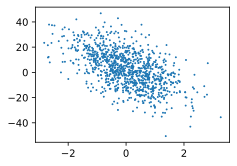

In [75]:
# Generate the data
# we need to generate the X:features, y:labels and true parameters w_true and b_true
num_exmamples = 1000
num_features = 3
w_true = [2.3, -8.3, 12.1]
b_true = 2.9

features = torch.randn(num_exmamples,num_features,dtype=torch.float32)
labels = features[:,0] * w_true[0] + features[:,1] * w_true[1] + features[:,2] * w_true[2] + b_true      
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

print(features[0],labels[0])

# Visualize the relationship between features and labels
# using functions in d2dl package
def visualize_data(features, labels, dim):
    d2dl.use_svg_display()
    d2dl.set_figsize()
    plt.scatter(features[:,dim],labels,1)

visualize_data(features,labels,1)
    
# Transfer data to batches of features and labels
# use yield to iterate intermediate result inside for loop (one batch data), and returns a list of [X,y] batch data in the end.
# shuffle the index, pick by batches, and select the picked index list from features and labels.
batch_size = 10
def data_iterator(features, labels, batch_size):
    num_of_examples = len(features)
    index_box = list(range(num_of_examples))
    random.shuffle(index_box)
    # transfer shuffled data to batches
    for i in range(0,num_exmamples,batch_size):
        # pick a batch_size of samples from index_box, notice to consider the boundary.
        pick_range = torch.LongTensor(index_box[i:min(i+batch_size,num_of_examples)])
        yield features.index_select(0,pick_range), labels.index_select(0,pick_range)  # index_select(by row/column, the id of indexes)
#test
for X,y in data_iterator(features,labels,batch_size):
    print(X,y)
    break

# Build the model
def linear_regression(X, w, b):
    return torch.mm(X,w)+b

def compute_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

def sgd_optimizor(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

# Training process
# initialize the parameters
w = torch.tensor(np.random.normal(0,0.01,size=(num_features,1)),dtype=torch.float32,requires_grad=True)
b = torch.zeros(1,dtype=torch.float32,requires_grad=True)
# set require_grads to TRUE
#w.requires_grad_(True)
#b.requires_grad_(True)

num_epochs = 10
learning_rate = 0.03
for epoch in range(num_epochs):
    for X, y in data_iterator(features, labels, batch_size):
        loss = compute_loss(linear_regression(X, w, b),y).sum()
        loss.backward()
        sgd_optimizor([w,b],learning_rate, batch_size)
        
        # set the gradient of parameters to 0 each time
        w.grad.data.zero_()
        b.grad.data.zero_()
    
    epoch_loss_mean = compute_loss(linear_regression(features, w, b), labels).mean()
    print('epoch: %d, mean_loss:%f' %(epoch, epoch_loss_mean.item()))

# Result
print(w_true, w)
print(b_true, b)

tensor([-0.3524,  0.9312, -0.1466]) tensor(-7.4094)
LR_model(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.3104, -0.2324,  0.1210]], requires_grad=True)
Parameter containing:
tensor([-0.4837], requires_grad=True)
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)
epoch: 0, loss_mean_last_batch: 0.001483, loss_mean_total: 0.001023
epoch: 1, loss_mean_last_batch: 0.000239, loss_mean_total: 0.000104
epoch: 2, loss_mean_last_batch: 0.000127, loss_mean_total: 0.000103
epoch: 3, loss_mean_last_batch: 0.000116, loss_mean_total: 0.000104
epoch: 4, loss_mean_last_batch: 0.000081, loss_mean_total: 0.000103
epoch: 5, loss_mean_last_batch: 0.000048, loss_mean_total: 0.000103
epoch: 6, loss_mean_last_batch: 0.000049, loss_mean_total: 0.000103
epoch: 7, loss_mean_last_batch: 0.000200, loss_mean_total: 0.000105
epoch: 8, loss_mean_last_batch: 0.000261, loss_mean_total: 0.000103
epoch: 9, l

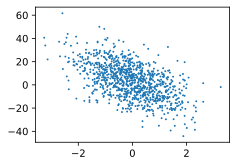

In [73]:
# Pytorch way: using self-defined class

# Generate the data
# we need to generate the X:features, y:labels and true parameters w_true and b_true
num_exmamples = 1000
num_features = 3
w_true = [2.3, -8.3, 12.1]
b_true = 2.9

features = torch.randn(num_exmamples,num_features,dtype=torch.float32)
labels = features[:,0] * w_true[0] + features[:,1] * w_true[1] + features[:,2] * w_true[2] + b_true      
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

print(features[0],labels[0])

# Visualize the relationship between features and labels
# using functions in d2dl package
def visualize_data(features, labels, dim):
    d2dl.use_svg_display()
    d2dl.set_figsize()
    plt.scatter(features[:,dim],labels,1)

visualize_data(features,labels,1)

# Load data and batch data
from torch.utils import data as Data 
batch_size = 10
dataset = Data.TensorDataset(features,labels)
data_iterator = Data.DataLoader(dataset, batch_size, shuffle=True)

# Build the model
from torch import nn as nn
class LR_model(nn.Module):
    def __init__(self, num_features):
        super(LR_model, self).__init__()
        self.linear = nn.Linear(num_features,1)
    def forward(self,x):
        y = self.linear(x)
        return y

# model instance
net = LR_model(num_features)
print(net)

# check model parameters
for param in net.parameters():
    print(param)

# initialize the parameters
from torch.nn import init
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)

# define the loss measure
# MSELoss(reduction: str = 'mean'), by default, it returns a scalar and mean_loss
# alternatively, you can set sum or none, particularly none returns a vector while others returns a scalar
# MSELoss in doesn't have a '/2' in the formula.
loss_func = nn.MSELoss() 
loss_func_sum = nn.MSELoss(reduction='sum') 

 
# define the optimization method
from torch import optim as optim
sgd = optim.SGD(net.parameters(),lr=0.03)
print(sgd)

# Training process
num_epochs = 10
for epoch in range(num_epochs):
    for X,y in data_iterator:
        output = net(X)
        loss = loss_func(output,y.view(-1,1))
        sgd.zero_grad()
        loss.backward()
        sgd.step()
    print('epoch: %d, loss_mean_last_batch: %f, loss_mean_total: %f' %(epoch, loss.item(), loss_func(net(features),labels.view(-1,1)).item()))

# Result
dense = net.linear
print(w_true, dense.weight)
print(b_true, dense.bias)

tensor([ 0.0055,  0.9446, -1.9755]) tensor(-28.8068)
Sequential(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)
Linear(in_features=3, out_features=1, bias=True)
Parameter containing:
tensor([[-0.4032, -0.0880,  0.0707]], requires_grad=True)
Parameter containing:
tensor([-0.4237], requires_grad=True)
epoch: 0, loss_sum_last_batch: 0.001496, loss_sum_total: 0.000668
epoch: 1, loss_sum_last_batch: 0.000125, loss_sum_total: 0.000101
epoch: 2, loss_sum_last_batch: 0.000078, loss_sum_total: 0.000101
epoch: 3, loss_sum_last_batch: 0.000100, loss_sum_total: 0.000100
epoch: 4, loss_sum_last_batch: 0.000063, loss_sum_total: 0.000102
epoch: 5, loss_sum_last_batch: 0.000173, loss_sum_total: 0.000101
epoch: 6, loss_sum_last_batch: 0.000079, loss_sum_total: 0.000100
epoch: 7, loss_sum_last_batch: 0.000220, loss_sum_total: 0.000102
epoch: 8, loss_sum_last_batch: 0.000063, loss_sum_total: 0.000101
epoch: 9, loss_sum_last_batch: 0.000155, loss_sum_total: 0.000100
[2.3, -8.3, 12.1] Param

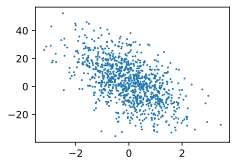

In [76]:
# Pytorch way: using Sequential model

# Generate the data
# we need to generate the X:features, y:labels and true parameters w_true and b_true
num_exmamples = 1000
num_features = 3
w_true = [2.3, -8.3, 12.1]
b_true = 2.9

features = torch.randn(num_exmamples,num_features,dtype=torch.float32)
labels = features[:,0] * w_true[0] + features[:,1] * w_true[1] + features[:,2] * w_true[2] + b_true      
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

print(features[0],labels[0])

# Visualize the relationship between features and labels
# using functions in d2dl package
def visualize_data(features, labels, dim):
    d2dl.use_svg_display()
    d2dl.set_figsize()
    plt.scatter(features[:,dim],labels,1)

visualize_data(features,labels,1)

# Load data and batch data
batch_size = 10
from torch.utils import data as Data
dataset = Data.TensorDataset(features,labels)
data_iterator = Data.DataLoader(dataset, batch_size, shuffle=True)

# Build the model & create model instance
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_features,1))
print(net)
print(net[0])

# another way to define a Sequential net
#net = nn.Sequential(
#      nn.Linear(num_features,1)
#)

# check parameters (all requires_grad)
for param in net.parameters():
    print(param)

# initialize the parameters
from torch.nn import init
init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

# define the loss measure
loss_func = nn.MSELoss()

# define the optimization method
from torch import optim as optim
optimizor = optim.SGD(net.parameters(),lr=0.03)

# Training process
num_epochs = 10
for epoch in range(num_epochs):
    for X,y in data_iterator:
        output = net(X)
        loss = loss_func(output, y.view(-1,1))
        optimizor.zero_grad()
        loss.backward()
        optimizor.step()
    print('epoch: %d, loss_mean_last_batch: %f, loss_mean_total: %f' %(epoch, loss.item(), loss_func(net(features),labels.view(-1,1)).item()))

# Result
dense = net[0]
print(w_true, dense.weight)
print(b_true, dense.bias)